In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

amazon_sales_data = pd.read_csv("/content/Amazon Sale Report.csv")

In [4]:
# Convert 'Date' column to datetime
amazon_sales_data['Date'] = pd.to_datetime(amazon_sales_data['Date'], format='%m-%d-%y', errors='coerce')

In [3]:
amazon_sales_data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [5]:
# Fill missing values in 'Amount' with 0 (for safe aggregation)
amazon_sales_data['Amount'] = amazon_sales_data['Amount'].fillna(0)

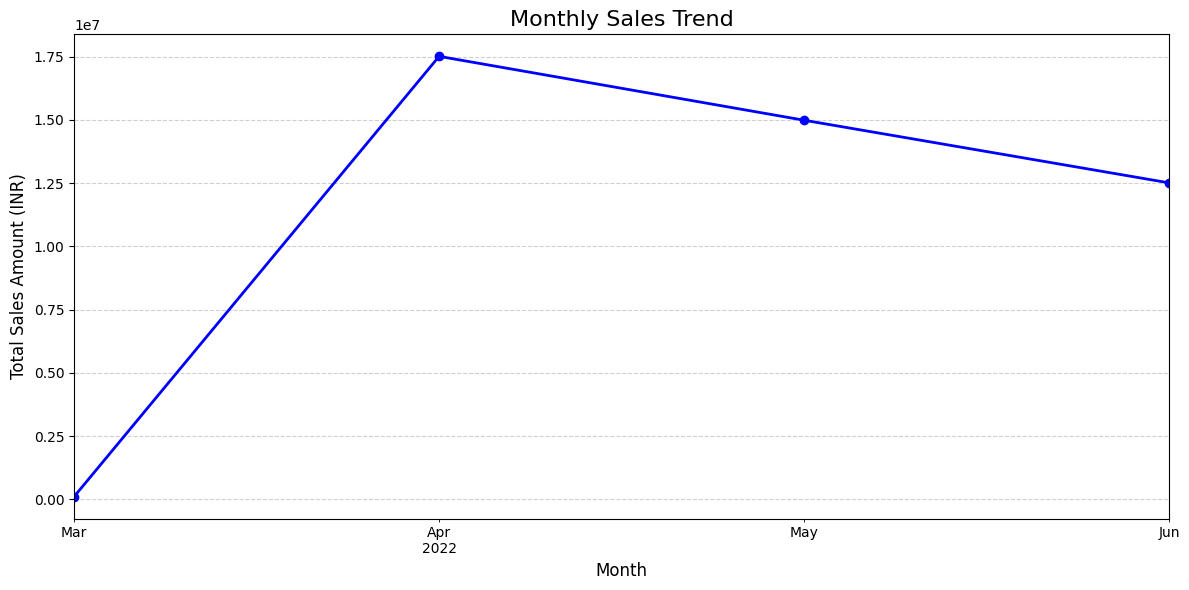

In [6]:
### 1. Sales Overview

# Group sales data by month and calculate total sales amount
monthly_sales = amazon_sales_data.groupby(amazon_sales_data['Date'].dt.to_period('M'))['Amount'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-10-aefd7118271e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_qty.index, y=category_qty.values, palette='viridis')


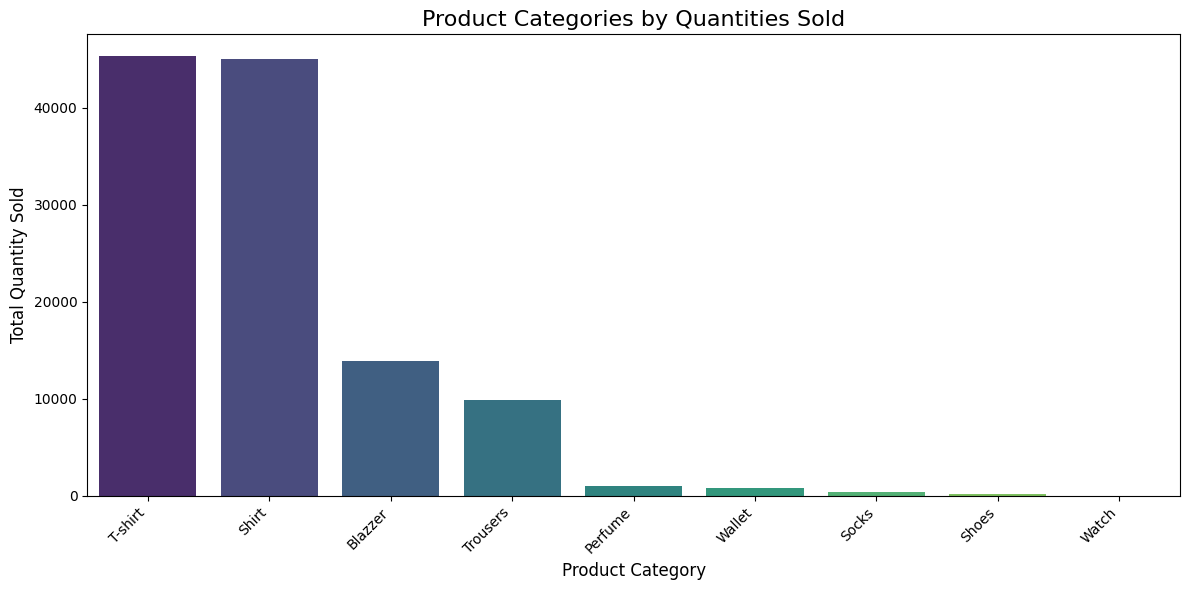

<ipython-input-10-aefd7118271e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_amount.index, y=category_amount.values, palette='magma')


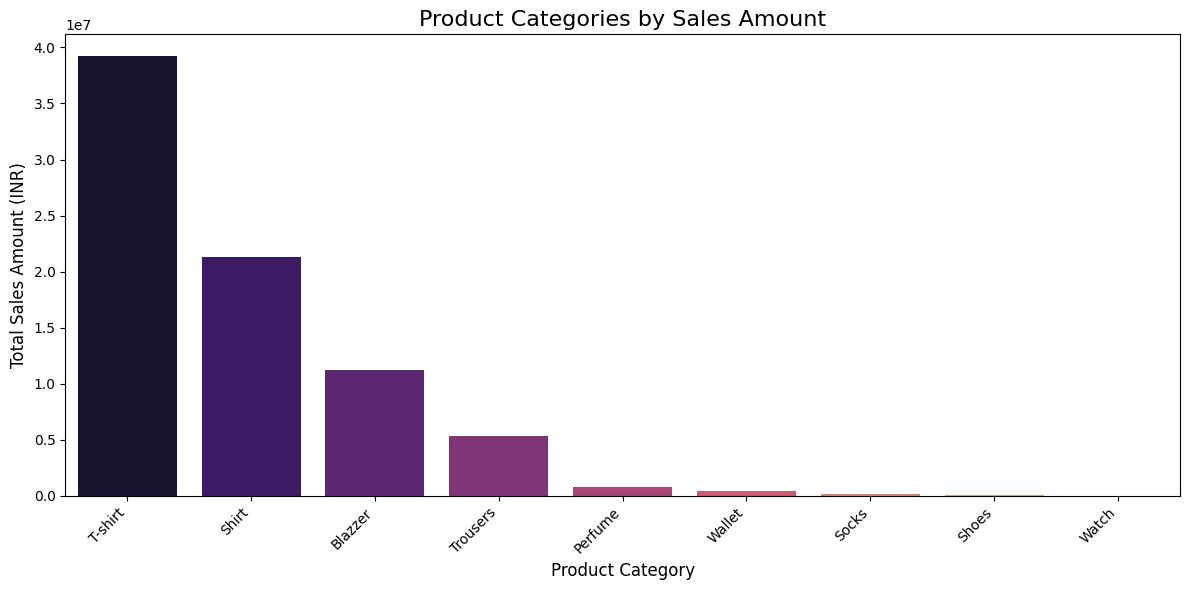

<ipython-input-10-aefd7118271e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_qty.index, y=size_qty.values, palette='coolwarm')


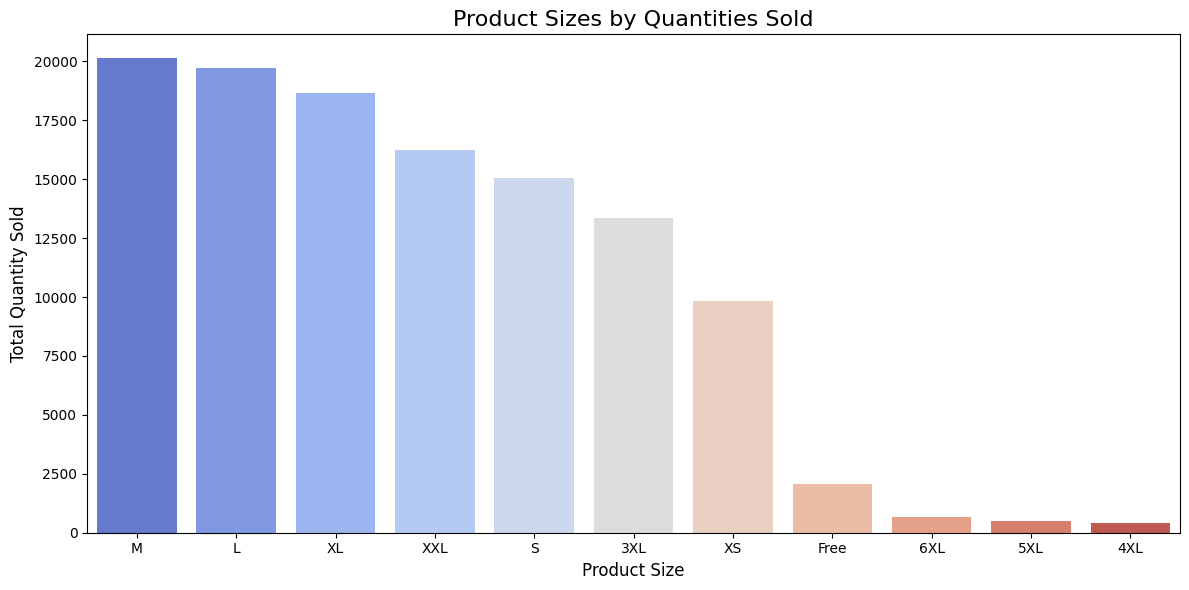

<ipython-input-10-aefd7118271e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_amount.index, y=size_amount.values, palette='plasma')


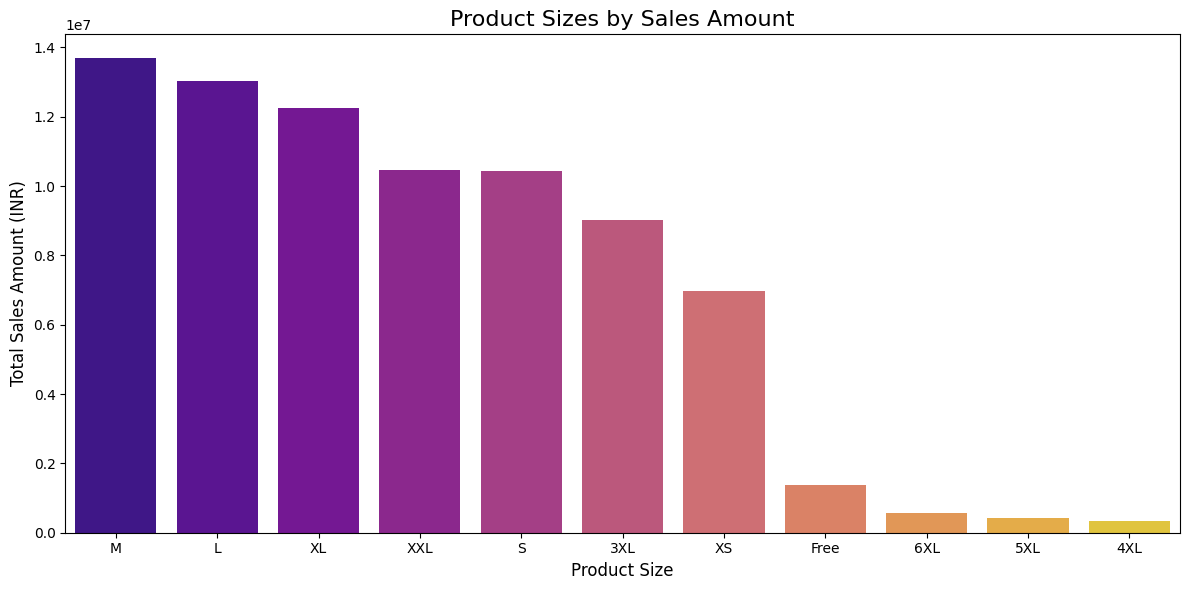

Top 5 Popular Product Categories by Quantity Sold:
Category
T-shirt     45292
Shirt       45044
Blazzer     13943
Trousers     9898
Perfume      1051
Name: Qty, dtype: int64

Top 5 Popular Product Categories by Sales Amount:
Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Name: Amount, dtype: float64


In [10]:
### 2. Product Analysis

category_qty = amazon_sales_data.groupby('Category')['Qty'].sum().sort_values(ascending=False)
category_amount = amazon_sales_data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot the distribution of product categories by quantity sold
plt.figure(figsize=(12, 6))
sns.barplot(x=category_qty.index, y=category_qty.values, palette='viridis')
plt.title('Product Categories by Quantities Sold', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the distribution of product categories by sales amount
plt.figure(figsize=(12, 6))
sns.barplot(x=category_amount.index, y=category_amount.values, palette='magma')
plt.title('Product Categories by Sales Amount', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. Analyze Distribution of Product Sizes ###
size_qty = amazon_sales_data.groupby('Size')['Qty'].sum().sort_values(ascending=False)
size_amount = amazon_sales_data.groupby('Size')['Amount'].sum().sort_values(ascending=False)

# Plot the distribution of product sizes by quantity sold
plt.figure(figsize=(12, 6))
sns.barplot(x=size_qty.index, y=size_qty.values, palette='coolwarm')
plt.title('Product Sizes by Quantities Sold', fontsize=16)
plt.xlabel('Product Size', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.tight_layout()
plt.show()

# Plot the distribution of product sizes by sales amount
plt.figure(figsize=(12, 6))
sns.barplot(x=size_amount.index, y=size_amount.values, palette='plasma')
plt.title('Product Sizes by Sales Amount', fontsize=16)
plt.xlabel('Product Size', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.tight_layout()
plt.show()

### 3. Identify Popular Products ###
# Popular products by quantity sold
popular_products_by_qty = category_qty.head(5)
print("Top 5 Popular Product Categories by Quantity Sold:")
print(popular_products_by_qty)

# Popular products by sales amount
popular_products_by_amount = category_amount.head(5)
print("\nTop 5 Popular Product Categories by Sales Amount:")
print(popular_products_by_amount)


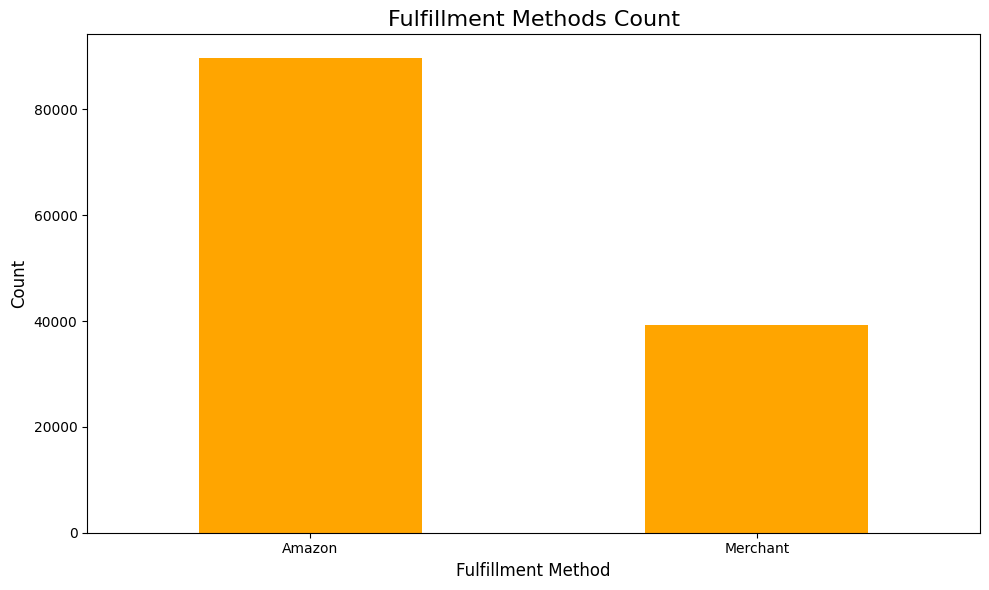

In [11]:
### 3. Fulfillment Analysis

# Count fulfillment methods and their effectiveness (using Courier Status)
fulfillment_counts = amazon_sales_data['Fulfilment'].value_counts()
courier_status_effectiveness = amazon_sales_data.groupby('Courier Status')['Fulfilment'].count()

# Plot fulfillment methods
plt.figure(figsize=(10, 6))
fulfillment_counts.plot(kind='bar', color='orange')
plt.title('Fulfillment Methods Count', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

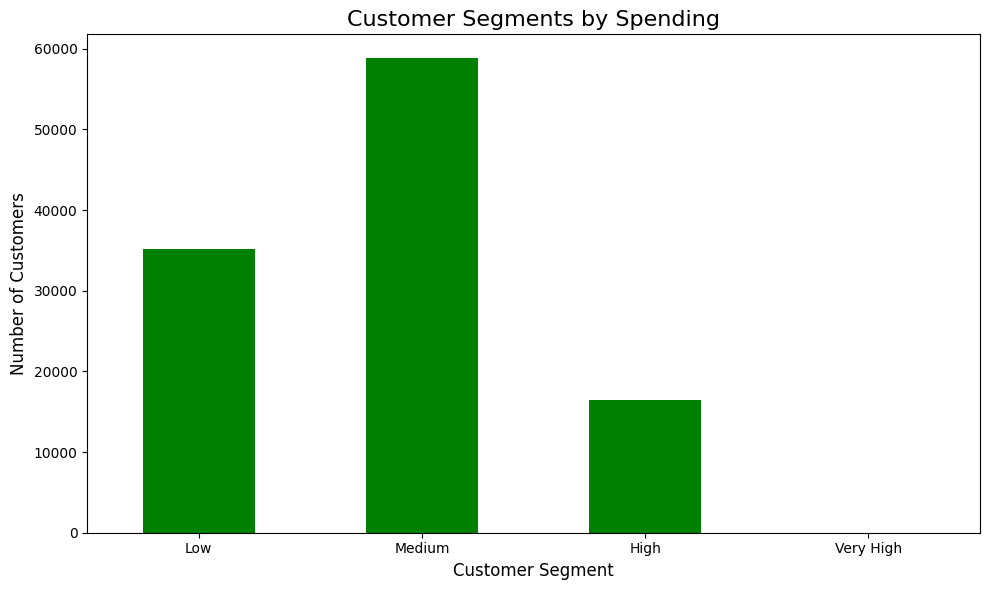

In [14]:
### 4. Customer Segmentation

# Check the maximum value of customer spending
max_spending = customer_spending.max()

# Dynamically define bins based on the data
if max_spending <= 500:
    bins = [0, max_spending + 1]
    labels = ['Low']
elif max_spending <= 1000:
    bins = [0, 500, max_spending + 1]
    labels = ['Low', 'Medium']
elif max_spending <= 5000:
    bins = [0, 500, 1000, max_spending + 1]
    labels = ['Low', 'Medium', 'High']
elif max_spending <= 10000:
    bins = [0, 500, 1000, 5000, max_spending + 1]
    labels = ['Low', 'Medium', 'High', 'Very High']
else:
    bins = [0, 500, 1000, 5000, 10000, max_spending + 1]
    labels = ['Low', 'Medium', 'High', 'Very High', 'Top']

# Create customer segments using pd.cut
customer_segments = pd.cut(customer_spending, bins=bins, labels=labels)

# Plot customer segments
plt.figure(figsize=(10, 6))
customer_segments.value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Customer Segments by Spending', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-15-90d8ce8f18ff>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index[:10], y=state_sales.values[:10], palette='magma')


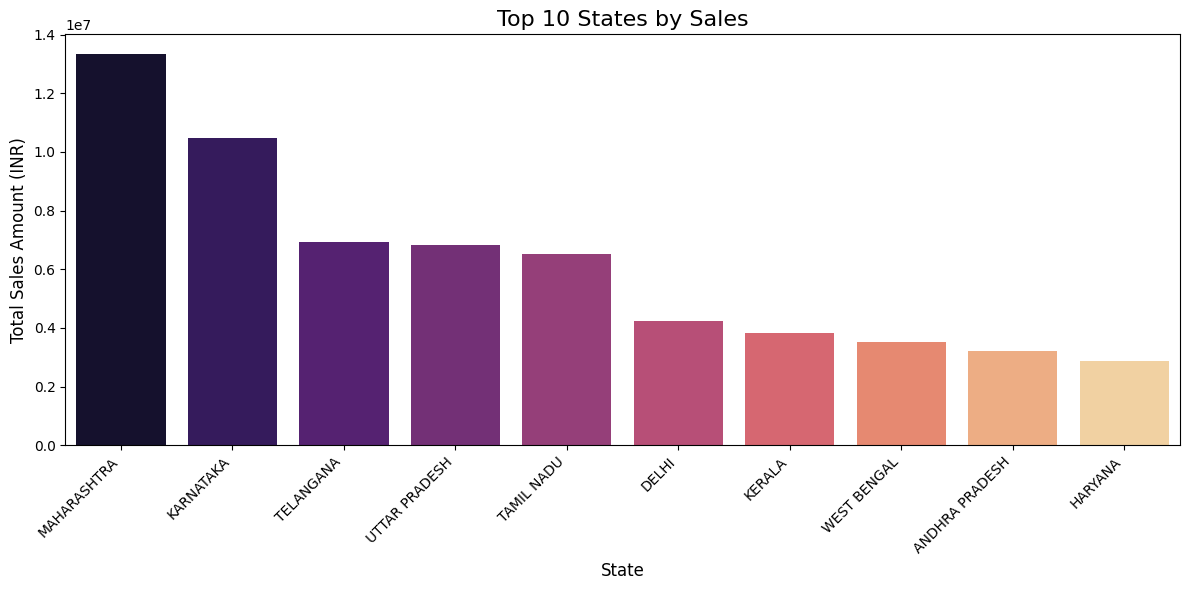

In [15]:
### 5. Geographical Analysis

# Group by states and sum sales
state_sales = amazon_sales_data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Plot top-performing states
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index[:10], y=state_sales.values[:10], palette='magma')
plt.title('Top 10 States by Sales', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insights and Recommendations for Businesses

Sales Optimization:

Schedule promotions for off-peak months, and make the most of sales during peak months.

Popular Products:

Focus inventory and marketing around your top-selling categories and sizes.

Optimize or discontinue to prep underperforming categories.

Fulfillment:

Make commonly used fulfillment methods more efficient.

Work with the best couriers for optimal delivery success.

Customer Segmentation:

Lofty: reward your 'high spend' customers with loyalty programs.

Use personalized offers to nudge medium spenders to spend more.

Geographical Focus:

Focus on the states/cities with the highest sales to fire up.

Localised campaigns to understand barriers in underperforming geographies.